In [52]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from numpy import argmax

In [5]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression().fit(X_train, y_train)

In [6]:
y_pred_proba = model.predict_proba(X_test)

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

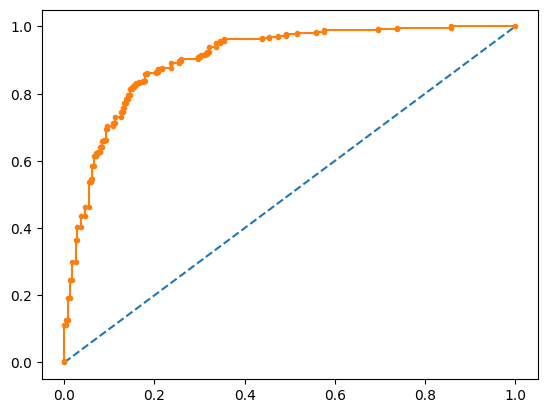

In [10]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [13]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

In [16]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

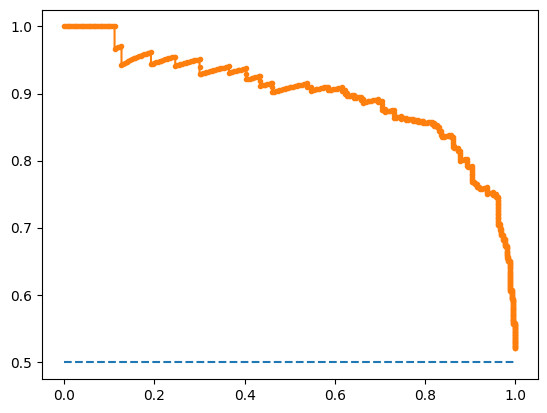

In [17]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [20]:
auc(recall, precision)

0.8977244980325834

In [23]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



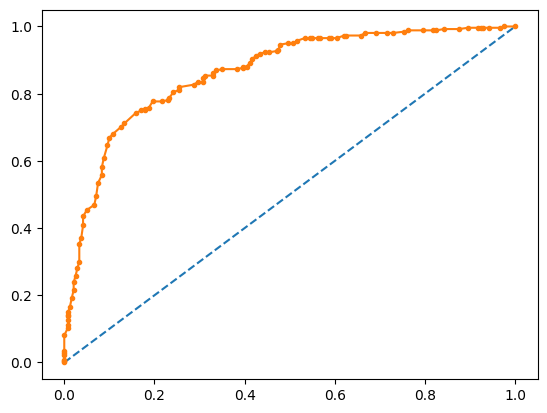

In [25]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [26]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

In [27]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [29]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

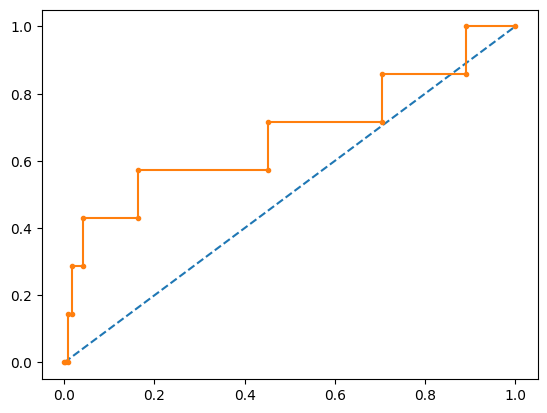

In [30]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

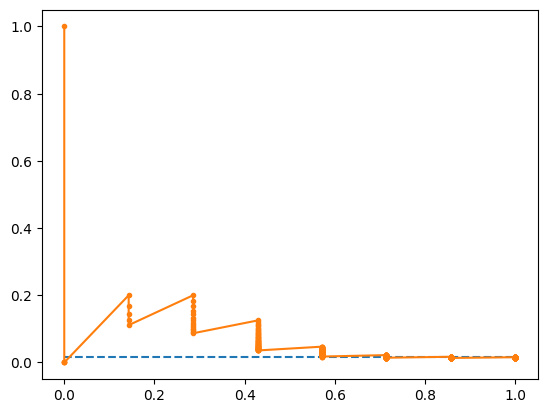

In [31]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

Визуализация датасета


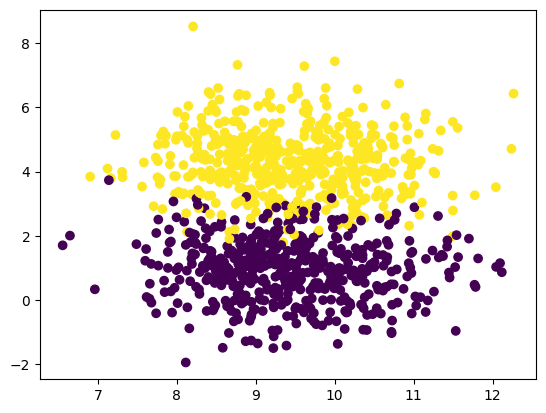

In [107]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2,
                  shuffle=True, random_state=4)
plt.scatter(X[:, 0], X[:, 1], c=y)
print("Визуализация датасета")
plt.show()

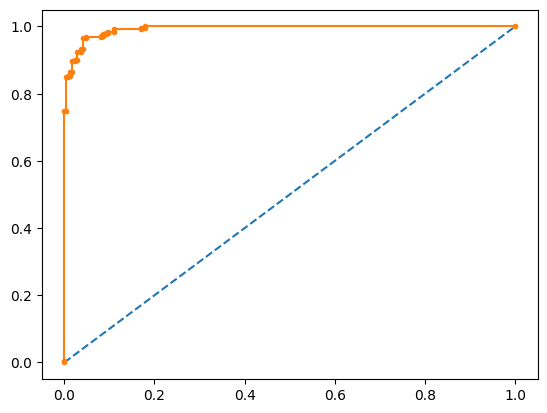

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

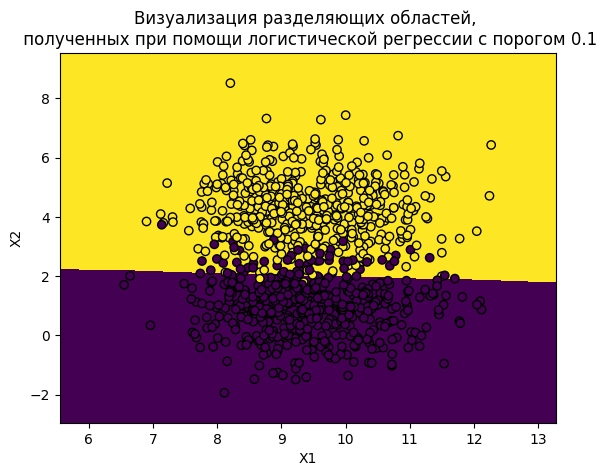

In [121]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X_train.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = (model.predict_proba(np.c_[X0_grid.ravel(),X1_grid.ravel()])[:, 1] > 0.1).astype('int').reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи логистической регрессии с порогом 0.1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [122]:
y_pred = (y_pred_proba[:, 1] > 0.1).astype('int')
roc_auc_score(y_test, y_pred)

0.9393672688867197

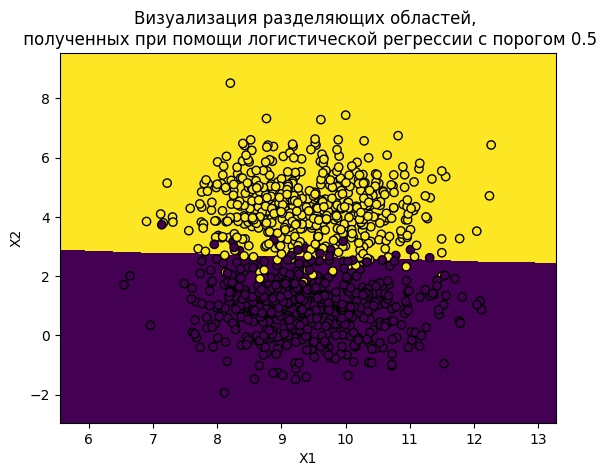

In [123]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X_train.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = (model.predict_proba(np.c_[X0_grid.ravel(),X1_grid.ravel()])[:, 1] > 0.5).astype('int').reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи логистической регрессии с порогом 0.5')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [124]:
y_pred = (y_pred_proba[:, 1] > 0.5).astype('int')
roc_auc_score(y_test, y_pred)

0.9560416700004801

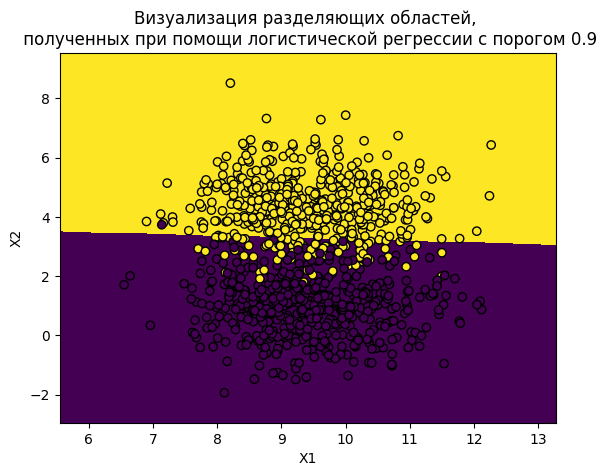

In [94]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X_train.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = (model.predict_proba(np.c_[X0_grid.ravel(),X1_grid.ravel()])[:, 1] > 0.9).astype('int').reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи логистической регрессии с порогом 0.9')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [95]:
y_pred = (y_pred_proba[:, 1] > 0.9).astype('int')
roc_auc_score(y_test, y_pred)

0.9011377638379927

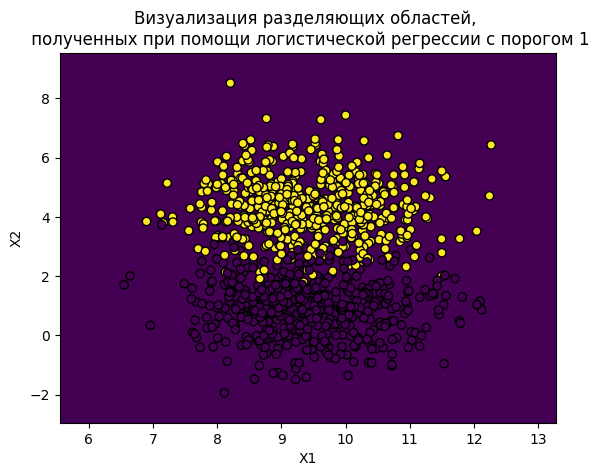

In [96]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X_train.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = (model.predict_proba(np.c_[X0_grid.ravel(),X1_grid.ravel()])[:, 1] > 1).astype('int').reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи логистической регрессии с порогом 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [97]:
y_pred = (y_pred_proba[:, 1] > 1).astype('int')
roc_auc_score(y_test, y_pred)

0.5

Самая лучшая точность у 0.5

2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [125]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

X = data.data
y = data.target

Визуализация датасета


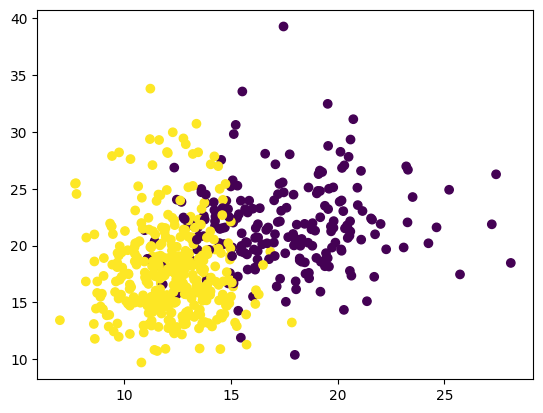

In [126]:
plt.scatter(X[:, 0], X[:, 1], c=y)
print("Визуализация датасета")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


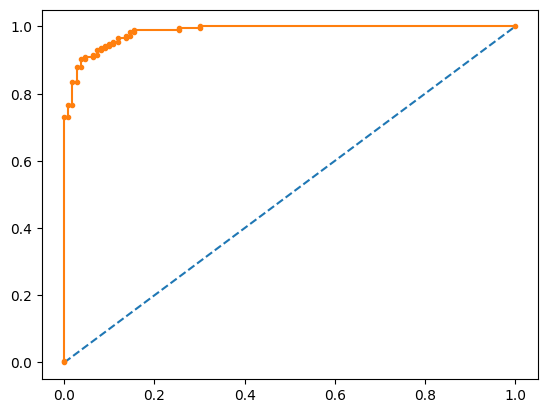

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [129]:
y_pred = (y_pred_proba[:, 1] > 0.1).astype('int')
roc_auc_score(y_test, y_pred)

0.917012987012987

In [130]:
y_pred = (y_pred_proba[:, 1] > 0.5).astype('int')
roc_auc_score(y_test, y_pred)

0.9225974025974025

In [131]:
y_pred = (y_pred_proba[:, 1] > 0.9).astype('int')
roc_auc_score(y_test, y_pred)

0.9206493506493507

3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

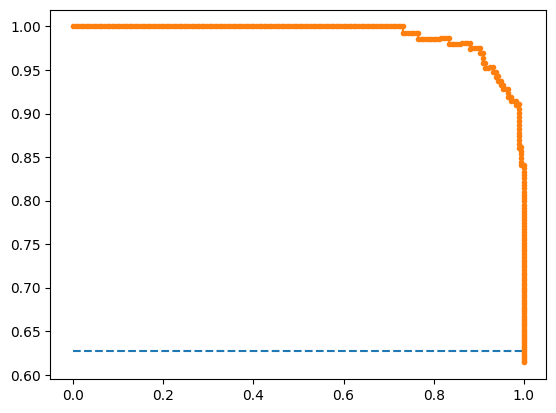

In [133]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

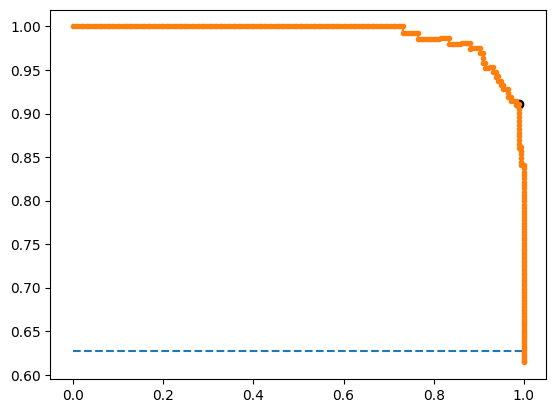

In [135]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [138]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

Порог=0.128598, F-Score=0.948
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       110
           1       0.91      0.98      0.95       175

    accuracy                           0.93       285
   macro avg       0.94      0.91      0.92       285
weighted avg       0.93      0.93      0.93       285

0.9141558441558442


4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

Рассмотренная F-мера уже дает неплохие результаты объединения двух показателей precision и recall, но она учитывает их в равной степени. А, что если мы хотим уделять больше внимания показателю precision или, наоборот, recall? Для этого было придумано расширение F-меры до Fβ-меры, которая определяется выражением:

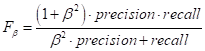

Здесь β – любое действительное число:

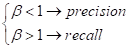

При β=1 получаем обычную F-меру.

Порог=0.003024, F (преимущество по recall) =0.998 - кружочек
Порог=0.003024, F (преимущество по precision) =0.960 - крестик


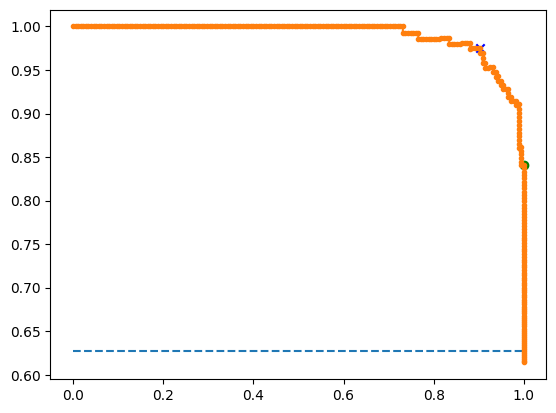

Порог  0.003023907592870461
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       110
           1       0.84      0.99      0.91       175

    accuracy                           0.88       285
   macro avg       0.91      0.85      0.87       285
weighted avg       0.90      0.88      0.88       285

Порог  0.8483634851882592
              precision    recall  f1-score   support

           0       0.85      0.96      0.91       110
           1       0.98      0.90      0.93       175

    accuracy                           0.92       285
   macro avg       0.91      0.93      0.92       285
weighted avg       0.93      0.92      0.92       285



In [141]:
Fr = ((1+10**2)*p*r)/((10**2)*p+r)
Fp = ((1+(0.5)**2)*p*r)/(((0.5)**2)*p+r)

ix1 = argmax(Fr)
print('Порог=%f, F (преимущество по recall) =%.3f - кружочек' % (pr_thresholds[ix], Fr[ix1]))

ix2 = argmax(Fp)
print('Порог=%f, F (преимущество по precision) =%.3f - крестик' % (pr_thresholds[ix1], Fp[ix2]))

plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix1], p[ix1], marker='o', color='green')
plt.scatter(r[ix2], p[ix2], marker='x', color='blue')
plt.show()

y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix1]).astype('int')
print("Порог ", pr_thresholds[ix1])
print(classification_report(y_test, y_pred))

y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix2]).astype('int')
print("Порог ", pr_thresholds[ix2])
print(classification_report(y_test, y_pred))

5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

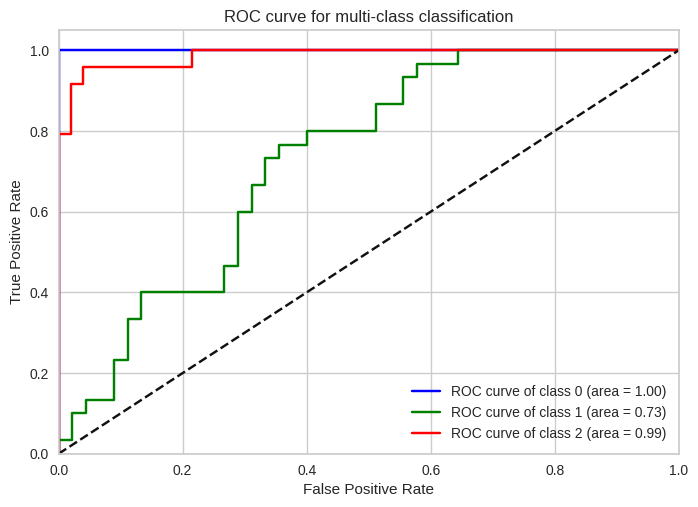

In [173]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target

# Преобразуем метки классов в бинарные
y_test_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = 3

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_test_bin, test_size=0.5, random_state=0)

# Обучение классификатора
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, y_train)

# Получение вероятностей принадлежности к классам
y_score = classifier.predict_proba(X_test)

# Рассчитываем ROC-кривую для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Строим ROC-кривые
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()

6. Используйте для построения кривых библиотеку yellowbrick.

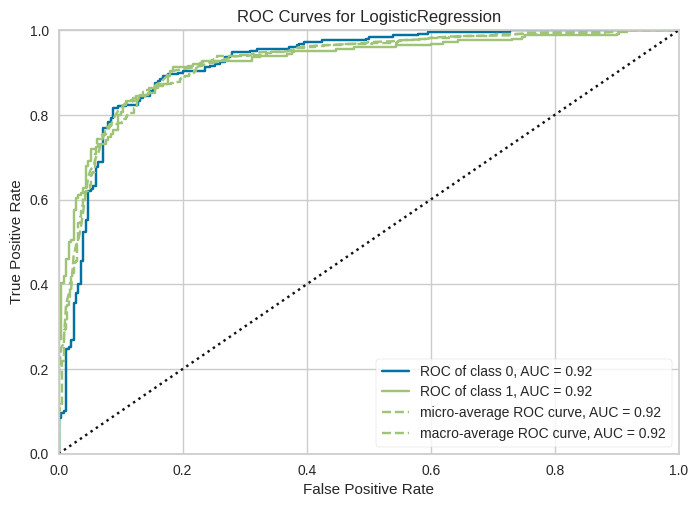

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [185]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ROCAUC

X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Построение ROC-кривой
visualizer = ROCAUC(model, classes=model.classes_)
visualizer.fit(X_train, y_train)  # Обучение классификатора
visualizer.score(X_test, y_test)  # Оценка тестовых данных
visualizer.show()
